# Wave Energy Farm via supervised ML


data source: https://archive.ics.uci.edu/dataset/882/large-scale+wave+energy+farm

# 1. Import Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#pd.options.display.max_columns = 304


In [2]:


# import perth_49
df_perth_49 = pd.read_csv("WEC_Perth_49.csv")


# import perth_100
df_perth_100 = pd.read_csv("WEC_Perth_100.csv")


# import sydney_49
df_sydney_49 = pd.read_csv("WEC_Sydney_49.csv")


# import sydney_100
df_sydney_100 = pd.read_csv("WEC_Sydney_100.csv")

In [3]:
df_perth_49

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,88867.92,98844.30,101283.59,98934.63,101624.58,100915.03,99625.68,96704.34,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88896.55,98759.79,101346.07,98873.59,101629.01,100934.53,99606.13,96718.39,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88919.83,98746.68,101346.15,98875.57,101618.32,100941.00,99611.35,96719.14,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,88855.14,98760.96,101338.59,98971.58,101632.28,100943.59,99589.25,96735.04,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,88005.30,98630.24,100432.73,98803.01,101064.48,100948.38,99028.87,96286.71,0.79,3752648.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36038,100.0,250.0,250.00,250.00,300.00,200.00,400.00,100.00,900.0,150.0,...,100382.68,90042.10,99539.28,100219.37,70180.74,98693.05,100739.06,100530.96,0.86,4048188.53
36039,250.0,200.0,500.00,150.00,350.00,200.00,700.00,500.00,50.0,250.0,...,97576.89,89874.39,99413.89,83966.40,74140.17,66977.16,99768.78,92788.85,0.85,4033017.16
36040,200.0,100.0,400.00,100.00,350.00,500.00,750.00,200.00,700.0,250.0,...,101072.75,98181.96,77322.16,77632.27,102878.91,83002.93,91852.61,98283.28,0.86,4048053.62
36041,500.0,250.0,350.00,350.00,1000.00,250.00,550.00,150.00,800.0,0.0,...,99078.22,101120.28,73597.78,102042.99,58438.65,98804.39,66383.44,97423.85,0.86,4062515.64


In [4]:
df_perth_100

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power93,Power94,Power95,Power96,Power97,Power98,Power99,Power100,qW,Total_Power
0,1000.0,0.0,946.08,37.42,889.67,74.76,832.02,112.10,1250.0,1.0,...,98711.68,102872.82,100743.44,99259.87,98909.46,101388.37,101025.35,98676.66,0.75,7257985.04
1,800.0,0.0,746.04,37.38,689.81,74.79,632.43,111.97,1200.0,0.0,...,96351.38,102253.02,101744.20,99482.45,99304.59,101953.23,100878.42,99508.49,0.74,7103374.61
2,600.0,0.0,545.98,37.50,489.87,74.95,432.52,112.15,650.0,0.0,...,96985.29,102472.80,101757.63,99429.45,98709.14,101312.44,100979.86,99024.16,0.76,7335380.64
3,600.0,0.0,546.09,37.41,489.70,74.76,432.35,111.90,800.0,0.0,...,76823.85,88005.41,98779.92,100260.30,98744.25,101144.58,100835.43,98915.38,0.75,7187769.87
4,600.0,0.0,545.95,37.52,489.69,74.99,432.46,112.16,800.0,0.0,...,98195.95,102874.16,100256.15,99221.12,98969.54,101389.77,100924.02,98796.00,0.75,7260222.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7272,400.0,0.0,346.00,37.53,289.82,75.01,232.46,112.33,800.0,0.0,...,99104.39,102585.03,100857.36,99650.41,99024.64,101332.50,100908.17,98609.18,0.73,6999434.48
7273,600.0,0.0,545.99,37.40,489.60,74.85,432.15,112.06,1200.0,0.0,...,76888.88,87963.62,98670.06,100183.63,98864.04,101473.17,101046.22,98886.64,0.76,7276779.80
7274,800.0,0.0,746.02,37.49,689.64,74.88,632.16,111.95,1000.0,0.0,...,96907.49,102344.21,101694.54,99534.89,98811.98,101286.17,100915.36,98818.57,0.68,6590045.95
7275,200.0,0.0,145.95,37.45,89.56,74.91,32.06,112.07,400.0,0.0,...,99044.83,101371.05,100982.86,99375.66,98745.13,102343.53,100815.62,99134.26,0.74,7086707.66


In [5]:
df_sydney_49

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power42,Power43,Power44,Power45,Power46,Power47,Power48,Power49,qW,Total_Power
0,1.0,1.0,0.00,70.00,1.00,140.00,50.00,198.0,401.0,1.0,...,71909.82,70674.49,70972.33,90957.03,90903.63,87876.82,79499.23,68880.39,0.78,4065416.61
1,598.0,0.0,595.82,77.69,593.70,150.00,549.00,198.0,798.0,0.0,...,68757.68,70665.50,69963.48,84511.25,85691.70,85211.51,76678.20,76119.53,0.76,3951216.37
2,198.0,0.0,197.46,75.19,192.94,150.00,87.64,198.0,398.0,0.0,...,73675.80,77808.44,73519.82,91436.35,88770.60,86632.78,77932.46,69343.12,0.78,4022640.78
3,598.0,0.0,596.97,69.41,592.69,143.80,549.00,198.0,398.0,200.0,...,68947.21,71668.05,69380.67,85191.27,84453.12,85300.41,78573.25,72527.16,0.75,3879223.41
4,198.0,0.0,197.18,79.83,192.97,150.00,89.53,198.0,398.0,0.0,...,78367.97,79075.06,74354.03,85254.75,86978.69,86951.65,77671.87,74901.38,0.77,3974691.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17959,1.0,198.0,50.00,198.00,100.00,198.00,150.00,198.0,201.0,1.0,...,74777.95,75328.19,72050.55,92155.56,89410.09,87942.24,82359.52,69035.90,0.79,4079797.83
17960,398.0,0.0,397.60,72.29,393.00,147.07,349.00,198.0,598.0,0.0,...,70923.77,70611.23,68249.45,90978.35,87013.51,84596.98,76776.71,75651.54,0.75,3909303.33
17961,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,648.0,1.0,...,83075.11,76547.45,76059.62,96899.02,91713.87,88308.28,75781.49,70417.64,0.79,4111341.29
17962,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,648.0,1.0,...,80868.59,76420.36,75312.25,95833.13,92514.46,88406.40,79531.50,70704.51,0.79,4100219.73


In [6]:
df_sydney_100

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Power93,Power94,Power95,Power96,Power97,Power98,Power99,Power100,qW,Total_Power
0,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,...,74018.52,71727.79,67966.45,63101.26,88826.02,86531.44,83786.68,73514.19,0.69,7247491.41
1,198.0,0.0,197.18,80.53,193.59,150.00,77.58,198.0,598.0,0.0,...,63702.46,67776.99,65133.52,63138.74,82852.91,83519.30,81973.65,71781.34,0.67,7119352.90
2,198.0,0.0,197.07,76.64,192.74,155.74,84.67,198.0,798.0,0.0,...,55788.34,59593.98,60073.60,59198.12,63377.08,72078.85,77435.62,67457.26,0.68,7148342.69
3,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,...,66961.48,65716.93,66637.89,62562.54,80858.08,82656.53,82171.28,71713.30,0.69,7317998.83
4,198.0,0.0,197.46,75.07,197.18,149.14,149.00,198.0,598.0,0.0,...,51814.27,59556.86,68341.92,70731.90,64192.86,69757.10,75581.40,69741.63,0.65,6925096.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,198.0,0.0,197.60,72.52,193.04,150.00,84.79,198.0,398.0,0.0,...,52910.73,58836.45,66358.12,70612.76,56787.64,64467.41,70684.50,65052.85,0.66,6931277.32
2314,198.0,0.0,96.79,74.77,192.57,150.00,86.00,183.0,398.0,0.0,...,61488.75,61218.11,60007.02,59046.63,63865.77,67528.12,73769.96,66491.47,0.68,7192144.17
2315,598.0,0.0,597.72,67.53,593.10,146.65,549.00,198.0,198.0,200.0,...,52752.08,54870.32,59601.57,57798.28,66660.45,69518.08,74935.21,68514.79,0.64,6799187.00
2316,398.0,0.0,397.18,80.53,393.59,150.00,277.58,198.0,1398.0,0.0,...,58755.78,64815.63,62083.71,58053.22,80885.70,82062.11,80004.48,69454.11,0.67,7084526.52


## 1.1 EDA

<Axes: xlabel='qW', ylabel='Count'>

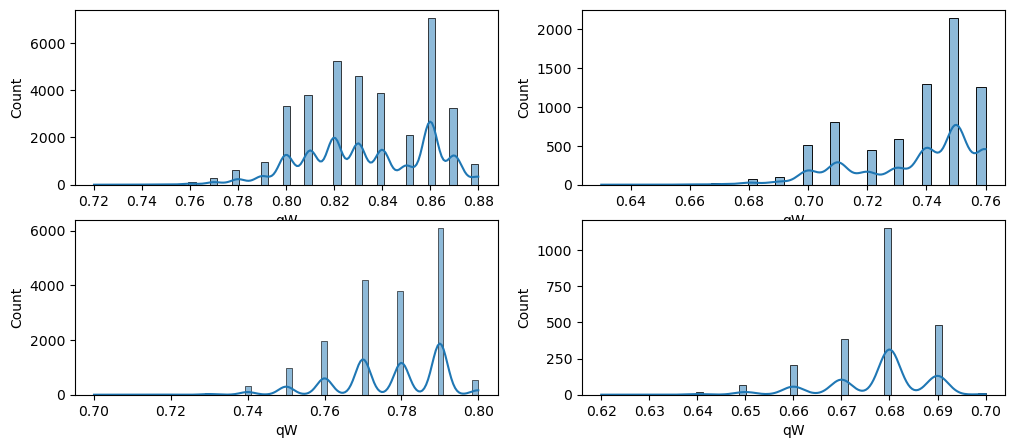

In [7]:
fig,axs = plt.subplots(2,2,figsize=(12,5))


sns.histplot(data=df_perth_49,x='qW',kde=True,ax=axs[0][0])
sns.histplot(data=df_perth_100,x='qW',kde=True,ax=axs[0][1])
sns.histplot(data=df_sydney_49,x='qW',kde=True,ax=axs[1][0])
sns.histplot(data=df_sydney_100,x='qW',kde=True,ax=axs[1][1])

<Axes: xlabel='qW'>

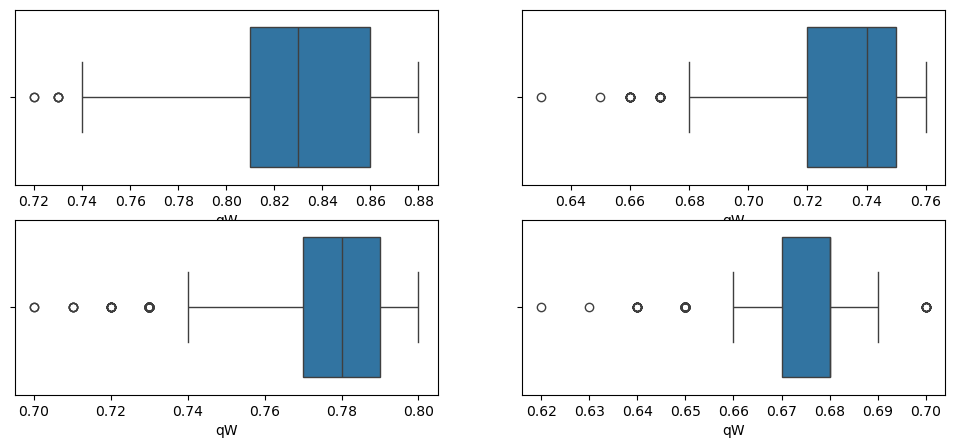

In [8]:
fig,axs = plt.subplots(2,2,figsize=(12,5))


sns.boxplot(data=df_perth_49,x='qW',ax=axs[0][0])
sns.boxplot(data=df_perth_100,x='qW',ax=axs[0][1])
sns.boxplot(data=df_sydney_49,x='qW',ax=axs[1][0])
sns.boxplot(data=df_sydney_100,x='qW',ax=axs[1][1])

<Axes: xlabel='Total_Power', ylabel='Count'>

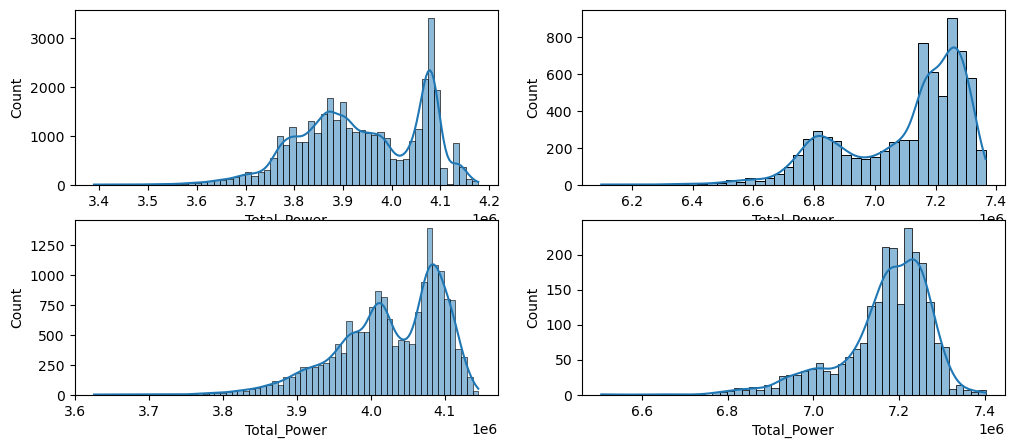

In [9]:
fig,axs = plt.subplots(2,2,figsize=(12,5))


sns.histplot(data=df_perth_49,x='Total_Power',kde=True,ax=axs[0][0])
sns.histplot(data=df_perth_100,x='Total_Power',kde=True,ax=axs[0][1])
sns.histplot(data=df_sydney_49,x='Total_Power',kde=True,ax=axs[1][0])
sns.histplot(data=df_sydney_100,x='Total_Power',kde=True,ax=axs[1][1])

<Axes: xlabel='Total_Power'>

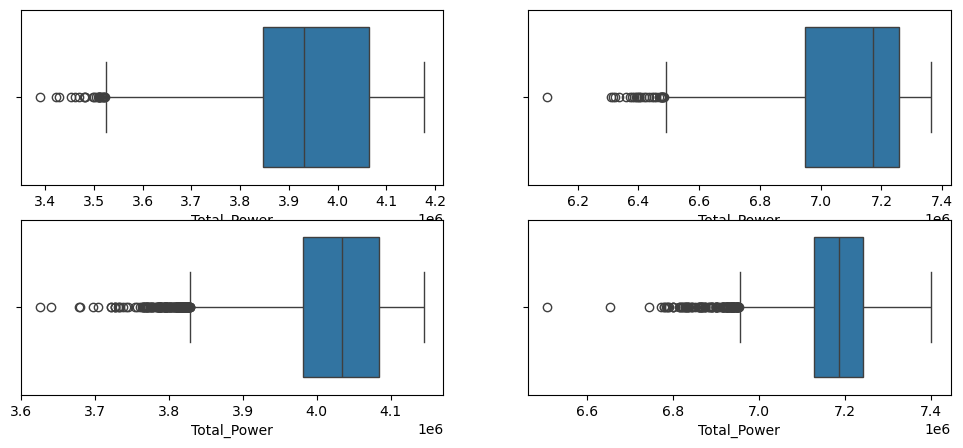

In [10]:
fig,axs = plt.subplots(2,2,figsize=(12,5))


sns.boxplot(data=df_perth_49,x='Total_Power',ax=axs[0][0])
sns.boxplot(data=df_perth_100,x='Total_Power',ax=axs[0][1])
sns.boxplot(data=df_sydney_49,x='Total_Power',ax=axs[1][0])
sns.boxplot(data=df_sydney_100,x='Total_Power',ax=axs[1][1])

## 1.2 Processing Data
- Extract Data 
- Align Columns: Add missing columns to smaller datasets.
- Add metadata: Include City and Generator_Size columns.

In [11]:
# dealing with Perth

# dealing with Perth_100
# Generate columns for the rest coordination X50, Y50, X51, Y51, ..., X100, Y100 via dictionary
missing_coordination_49 = {f"{coord}{i}": 0 for i in range(50, 101) for coord in ("X", "Y")}
# Generate columns for the rest coordination X50, Y50, X51, Y51, ..., X100, Y100
#missing_power = {f"{coord}{i}": 0 for i in range(50, 101) for coord in ("X", "Y")}
# adding meta data with city and size via dictionary
adding_perth_meta_49 = {"City":"Perth","Generator_Size":49}

# Create DataFrame with the new columns
missing_perth_df_49 = pd.DataFrame(missing_coordination_49, index=df_perth_49.index)
adding_perth_df_49 = pd.DataFrame(adding_perth_meta_49, index=df_perth_49.index)

# extract last two columns
last_two_perth_49  = df_perth_49.iloc[:,-2:]
# Concatenate original DataFrame with missing columns
# axis = 1 means contact by columns
df_perth_49 = pd.concat([df_perth_49.iloc[:,:98],missing_perth_df_49,adding_perth_df_49,last_two_perth_49], axis=1)
df_perth_49_seen = df_perth_49.iloc[:32438]
df_perth_49_unseen = df_perth_49.iloc[32438:]


# dealing with Perth_100
# adding meta data with city and size via dictionary
adding_meta_data_100 = {"City":"Perth","Generator_Size":100}
adding_perth_df_100 = pd.DataFrame(adding_meta_data_100, index=df_perth_100.index)
# extract last two columns
last_two_perth_100  = df_perth_100.iloc[:,-2:]
df_perth_100 = pd.concat([df_perth_100.iloc[:,:200],adding_perth_df_100,last_two_perth_100], axis=1)
df_perth_100_seen = df_perth_100.iloc[:6549]
df_perth_100_unseen = df_perth_100.iloc[6549:]

df_perth_seen =  pd.concat([df_perth_49_seen,df_perth_100_seen],ignore_index=True)
df_perth_unseen =  pd.concat([df_perth_49_unseen,df_perth_100_unseen],ignore_index=True)

In [12]:
df_perth_49

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,0,0,0,0,0,0,Perth,49,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,0,0,0,0,0,0,Perth,49,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,0,0,0,0,0,0,Perth,49,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,0,0,0,0,0,0,Perth,49,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,0,0,0,0,0,0,Perth,49,0.79,3752648.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36038,100.0,250.0,250.00,250.00,300.00,200.00,400.00,100.00,900.0,150.0,...,0,0,0,0,0,0,Perth,49,0.86,4048188.53
36039,250.0,200.0,500.00,150.00,350.00,200.00,700.00,500.00,50.0,250.0,...,0,0,0,0,0,0,Perth,49,0.85,4033017.16
36040,200.0,100.0,400.00,100.00,350.00,500.00,750.00,200.00,700.0,250.0,...,0,0,0,0,0,0,Perth,49,0.86,4048053.62
36041,500.0,250.0,350.00,350.00,1000.00,250.00,550.00,150.00,800.0,0.0,...,0,0,0,0,0,0,Perth,49,0.86,4062515.64


In [13]:
df_perth_49_seen

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,0,0,0,0,0,0,Perth,49,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,0,0,0,0,0,0,Perth,49,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,0,0,0,0,0,0,Perth,49,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,0,0,0,0,0,0,Perth,49,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,0,0,0,0,0,0,Perth,49,0.79,3752648.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32433,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,...,0,0,0,0,0,0,Perth,49,0.84,3946900.50
32434,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,600.0,200.0,...,0,0,0,0,0,0,Perth,49,0.84,3949391.21
32435,400.0,0.0,346.10,37.53,289.75,74.89,232.47,112.07,1000.0,0.0,...,0,0,0,0,0,0,Perth,49,0.79,3731948.08
32436,400.0,0.0,346.10,37.53,289.75,74.89,232.47,112.07,600.0,0.0,...,0,0,0,0,0,0,Perth,49,0.78,3665124.82


In [14]:
df_perth_49_unseen

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
32438,200.0,0.0,146.1,37.53,89.75,74.89,32.47,112.07,600.0,0.0,...,0,0,0,0,0,0,Perth,49,0.82,3857887.17
32439,600.0,0.0,546.1,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,...,0,0,0,0,0,0,Perth,49,0.83,3929983.50
32440,600.0,0.0,546.1,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,...,0,0,0,0,0,0,Perth,49,0.84,3972454.15
32441,200.0,0.0,146.1,37.53,89.75,74.89,32.47,112.07,600.0,0.0,...,0,0,0,0,0,0,Perth,49,0.85,3999093.91
32442,400.0,0.0,346.1,37.53,289.75,74.89,232.47,112.07,600.0,0.0,...,0,0,0,0,0,0,Perth,49,0.84,3963767.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36038,100.0,250.0,250.0,250.00,300.00,200.00,400.00,100.00,900.0,150.0,...,0,0,0,0,0,0,Perth,49,0.86,4048188.53
36039,250.0,200.0,500.0,150.00,350.00,200.00,700.00,500.00,50.0,250.0,...,0,0,0,0,0,0,Perth,49,0.85,4033017.16
36040,200.0,100.0,400.0,100.00,350.00,500.00,750.00,200.00,700.0,250.0,...,0,0,0,0,0,0,Perth,49,0.86,4048053.62
36041,500.0,250.0,350.0,350.00,1000.00,250.00,550.00,150.00,800.0,0.0,...,0,0,0,0,0,0,Perth,49,0.86,4062515.64


In [15]:
df_perth_100

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,1000.0,0.0,946.08,37.42,889.67,74.76,832.02,112.10,1250.0,1.0,...,1146.08,1237.42,1089.67,1274.76,1032.02,1312.10,Perth,100,0.75,7257985.04
1,800.0,0.0,746.04,37.38,689.81,74.79,632.43,111.97,1200.0,0.0,...,746.04,1237.38,689.81,1274.79,632.43,1311.97,Perth,100,0.74,7103374.61
2,600.0,0.0,545.98,37.50,489.87,74.95,432.52,112.15,650.0,0.0,...,945.98,1237.50,889.87,1274.95,832.52,1312.15,Perth,100,0.76,7335380.64
3,600.0,0.0,546.09,37.41,489.70,74.76,432.35,111.90,800.0,0.0,...,1146.09,1237.41,1089.70,1274.76,1032.35,1311.90,Perth,100,0.75,7187769.87
4,600.0,0.0,545.95,37.52,489.69,74.99,432.46,112.16,800.0,0.0,...,1145.95,1237.52,1089.69,1274.99,1032.46,1312.16,Perth,100,0.75,7260222.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7272,400.0,0.0,346.00,37.53,289.82,75.01,232.46,112.33,800.0,0.0,...,1346.00,1237.53,1289.82,1275.01,1232.46,1312.33,Perth,100,0.73,6999434.48
7273,600.0,0.0,545.99,37.40,489.60,74.85,432.15,112.06,1200.0,0.0,...,1145.99,1237.40,1089.60,1274.85,1032.15,1312.06,Perth,100,0.76,7276779.80
7274,800.0,0.0,746.02,37.49,689.64,74.88,632.16,111.95,1000.0,0.0,...,1146.02,1237.49,1089.64,1274.88,1032.16,1311.95,Perth,100,0.68,6590045.95
7275,200.0,0.0,145.95,37.45,89.56,74.91,32.06,112.07,400.0,0.0,...,145.95,1237.45,89.56,1274.91,32.06,1312.07,Perth,100,0.74,7086707.66


In [16]:
df_perth_100_seen

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,1000.00,0.00,946.08,37.42,889.67,74.76,832.02,112.10,1250.00,1.0,...,1146.08,1237.42,1089.67,1274.76,1032.02,1312.10,Perth,100,0.75,7257985.04
1,800.00,0.00,746.04,37.38,689.81,74.79,632.43,111.97,1200.00,0.0,...,746.04,1237.38,689.81,1274.79,632.43,1311.97,Perth,100,0.74,7103374.61
2,600.00,0.00,545.98,37.50,489.87,74.95,432.52,112.15,650.00,0.0,...,945.98,1237.50,889.87,1274.95,832.52,1312.15,Perth,100,0.76,7335380.64
3,600.00,0.00,546.09,37.41,489.70,74.76,432.35,111.90,800.00,0.0,...,1146.09,1237.41,1089.70,1274.76,1032.35,1311.90,Perth,100,0.75,7187769.87
4,600.00,0.00,545.95,37.52,489.69,74.99,432.46,112.16,800.00,0.0,...,1145.95,1237.52,1089.69,1274.99,1032.46,1312.16,Perth,100,0.75,7260222.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6544,400.00,0.00,346.07,37.31,289.76,74.65,232.30,111.75,800.00,50.0,...,1337.00,1231.00,1289.76,1274.65,1232.30,1311.75,Perth,100,0.74,7160446.23
6545,450.00,0.00,850.00,0.00,1250.00,0.00,300.00,100.00,450.00,100.0,...,550.00,1400.00,650.00,1400.00,1400.00,1400.00,Perth,100,0.69,6683962.63
6546,600.00,0.00,546.00,37.53,489.82,75.01,432.46,112.33,800.00,0.0,...,946.00,1237.53,889.82,1275.01,832.46,1312.33,Perth,100,0.75,7241290.68
6547,35.11,96.69,278.00,18.06,342.40,27.48,512.82,111.66,680.06,101.4,...,1082.66,1305.54,1220.27,1273.79,1337.17,1357.79,Perth,100,0.72,6891529.42


In [17]:
df_perth_100_unseen

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
6549,600.0,0.0,546.12,37.43,489.63,74.70,432.24,111.84,1000.0,0.0,...,746.12,1237.43,689.63,1274.70,632.24,1311.84,Perth,100,0.74,7159446.96
6550,1200.0,0.0,1145.95,37.46,1089.74,74.87,1032.16,112.09,1400.0,0.0,...,345.95,1237.46,289.74,1274.87,232.16,1312.09,Perth,100,0.74,7170866.71
6551,200.0,0.0,146.15,37.53,89.78,74.74,32.51,111.90,1200.0,0.0,...,1146.15,1237.53,1089.78,1274.74,1032.51,1311.90,Perth,100,0.75,7250490.50
6552,200.0,0.0,146.18,37.50,89.75,75.02,32.43,112.20,800.0,0.0,...,1346.18,1237.50,1289.75,1275.02,1232.43,1312.20,Perth,100,0.73,7077501.69
6553,1200.0,0.0,1146.16,37.47,1089.73,74.87,1032.38,112.12,1250.0,0.0,...,946.16,1237.47,889.73,1274.87,832.38,1312.12,Perth,100,0.76,7323918.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7272,400.0,0.0,346.00,37.53,289.82,75.01,232.46,112.33,800.0,0.0,...,1346.00,1237.53,1289.82,1275.01,1232.46,1312.33,Perth,100,0.73,6999434.48
7273,600.0,0.0,545.99,37.40,489.60,74.85,432.15,112.06,1200.0,0.0,...,1145.99,1237.40,1089.60,1274.85,1032.15,1312.06,Perth,100,0.76,7276779.80
7274,800.0,0.0,746.02,37.49,689.64,74.88,632.16,111.95,1000.0,0.0,...,1146.02,1237.49,1089.64,1274.88,1032.16,1311.95,Perth,100,0.68,6590045.95
7275,200.0,0.0,145.95,37.45,89.56,74.91,32.06,112.07,400.0,0.0,...,145.95,1237.45,89.56,1274.91,32.06,1312.07,Perth,100,0.74,7086707.66


In [18]:
# dealing with Sydney

# dealing with Sydney_100
# Generate columns for the rest coordination X50, Y50, X51, Y51, ..., X100, Y100 via dictionary
missing_coordination_49 = {f"{coord}{i}": 0 for i in range(50, 101) for coord in ("X", "Y")}
# Generate columns for the rest coordination X50, Y50, X51, Y51, ..., X100, Y100
#missing_power = {f"{coord}{i}": 0 for i in range(50, 101) for coord in ("X", "Y")}
# adding meta data with city and size via dictionary
adding_sydney_meta_49 = {"City":"Sydney","Generator_Size":49}

# Create DataFrame with the new columns
missing_sydney_df_49 = pd.DataFrame(missing_coordination_49, index=df_sydney_49.index)
adding_sydney_df_49 = pd.DataFrame(adding_sydney_meta_49, index=df_sydney_49.index)

# extract last two columns
last_two_sydney_49  = df_sydney_49.iloc[:,-2:]
# Concatenate original DataFrame with missing columns
# axis = 1 means contact by columns
df_sydney_49 = pd.concat([df_sydney_49.iloc[:,:98],missing_sydney_df_49,adding_sydney_df_49,last_two_sydney_49], axis=1)
df_sydney_49_seen = df_sydney_49.iloc[:16167]
df_sydney_49_unseen = df_sydney_49.iloc[16167:]


# dealing with Sydney_100
# adding meta data with city and size via dictionary
adding_sydney_meta_100 = {"City":"Sydney","Generator_Size":100}
adding_sydney_df_100 = pd.DataFrame(adding_sydney_meta_100, index=df_sydney_100.index)
# extract last two columns
last_two_sydney_100  = df_sydney_100.iloc[:,-2:]
df_sydney_100 = pd.concat([df_sydney_100.iloc[:,:200],adding_sydney_df_100,last_two_sydney_100], axis=1)
df_sydney_100_seen = df_sydney_100.iloc[:2086]
df_sydney_100_unseen = df_sydney_100.iloc[2086:]

df_sydney_seen =  pd.concat([df_sydney_49_seen,df_sydney_100_seen],ignore_index=True)
df_sydney_unseen =  pd.concat([df_sydney_49_unseen,df_sydney_100_unseen],ignore_index=True)

In [19]:
df_sydney_49

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,1.0,1.0,0.00,70.00,1.00,140.00,50.00,198.0,401.0,1.0,...,0,0,0,0,0,0,Sydney,49,0.78,4065416.61
1,598.0,0.0,595.82,77.69,593.70,150.00,549.00,198.0,798.0,0.0,...,0,0,0,0,0,0,Sydney,49,0.76,3951216.37
2,198.0,0.0,197.46,75.19,192.94,150.00,87.64,198.0,398.0,0.0,...,0,0,0,0,0,0,Sydney,49,0.78,4022640.78
3,598.0,0.0,596.97,69.41,592.69,143.80,549.00,198.0,398.0,200.0,...,0,0,0,0,0,0,Sydney,49,0.75,3879223.41
4,198.0,0.0,197.18,79.83,192.97,150.00,89.53,198.0,398.0,0.0,...,0,0,0,0,0,0,Sydney,49,0.77,3974691.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17959,1.0,198.0,50.00,198.00,100.00,198.00,150.00,198.0,201.0,1.0,...,0,0,0,0,0,0,Sydney,49,0.79,4079797.83
17960,398.0,0.0,397.60,72.29,393.00,147.07,349.00,198.0,598.0,0.0,...,0,0,0,0,0,0,Sydney,49,0.75,3909303.33
17961,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,648.0,1.0,...,0,0,0,0,0,0,Sydney,49,0.79,4111341.29
17962,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,648.0,1.0,...,0,0,0,0,0,0,Sydney,49,0.79,4100219.73


In [20]:
df_sydney_49_seen

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,1.0,1.0,0.00,70.00,1.00,140.00,50.00,198.0,401.0,1.0,...,0,0,0,0,0,0,Sydney,49,0.78,4065416.61
1,598.0,0.0,595.82,77.69,593.70,150.00,549.00,198.0,798.0,0.0,...,0,0,0,0,0,0,Sydney,49,0.76,3951216.37
2,198.0,0.0,197.46,75.19,192.94,150.00,87.64,198.0,398.0,0.0,...,0,0,0,0,0,0,Sydney,49,0.78,4022640.78
3,598.0,0.0,596.97,69.41,592.69,143.80,549.00,198.0,398.0,200.0,...,0,0,0,0,0,0,Sydney,49,0.75,3879223.41
4,198.0,0.0,197.18,79.83,192.97,150.00,89.53,198.0,398.0,0.0,...,0,0,0,0,0,0,Sydney,49,0.77,3974691.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16162,1.0,0.0,0.00,51.00,1.00,101.00,1.00,151.0,698.0,0.0,...,0,0,0,0,0,0,Sydney,49,0.79,4092293.35
16163,198.0,0.0,197.07,77.08,192.74,150.00,86.44,198.0,398.0,0.0,...,0,0,0,0,0,0,Sydney,49,0.76,3963655.04
16164,198.0,0.0,197.46,75.65,193.60,144.02,149.00,198.0,398.0,0.0,...,0,0,0,0,0,0,Sydney,49,0.77,3975343.05
16165,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,598.0,0.0,...,0,0,0,0,0,0,Sydney,49,0.79,4074033.11


In [21]:
df_sydney_49_unseen

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
16167,1.0,198.0,50.00,198.00,100.00,198.00,150.0,198.0,201.0,1.0,...,0,0,0,0,0,0,Sydney,49,0.79,4079797.83
16168,398.0,0.0,397.46,75.65,393.60,144.02,349.0,198.0,798.0,0.0,...,0,0,0,0,0,0,Sydney,49,0.75,3868987.32
16169,398.0,0.0,397.60,72.40,393.28,146.64,349.0,198.0,598.0,0.0,...,0,0,0,0,0,0,Sydney,49,0.75,3903230.24
16170,1.0,1.0,1.00,51.00,1.00,101.00,1.0,151.0,601.0,1.0,...,0,0,0,0,0,0,Sydney,49,0.80,4127609.92
16171,1.0,1.0,1.00,51.00,1.00,101.00,1.0,151.0,401.0,1.0,...,0,0,0,0,0,0,Sydney,49,0.79,4089153.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17959,1.0,198.0,50.00,198.00,100.00,198.00,150.0,198.0,201.0,1.0,...,0,0,0,0,0,0,Sydney,49,0.79,4079797.83
17960,398.0,0.0,397.60,72.29,393.00,147.07,349.0,198.0,598.0,0.0,...,0,0,0,0,0,0,Sydney,49,0.75,3909303.33
17961,1.0,1.0,1.00,51.00,1.00,101.00,1.0,151.0,648.0,1.0,...,0,0,0,0,0,0,Sydney,49,0.79,4111341.29
17962,1.0,1.0,1.00,51.00,1.00,101.00,1.0,151.0,648.0,1.0,...,0,0,0,0,0,0,Sydney,49,0.79,4100219.73


In [22]:
df_sydney_100

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,...,1397.46,1275.07,1397.18,1349.14,1349.00,1398.0,Sydney,100,0.69,7247491.41
1,198.0,0.0,197.18,80.53,193.59,150.00,77.58,198.0,598.0,0.0,...,1397.18,1280.53,1393.59,1350.00,1277.58,1398.0,Sydney,100,0.67,7119352.90
2,198.0,0.0,197.07,76.64,192.74,155.74,84.67,198.0,798.0,0.0,...,1197.07,1276.64,1192.74,1355.74,1084.67,1398.0,Sydney,100,0.68,7148342.69
3,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,...,1397.07,1276.56,1392.74,1354.90,1349.00,1398.0,Sydney,100,0.69,7317998.83
4,198.0,0.0,197.46,75.07,197.18,149.14,149.00,198.0,598.0,0.0,...,997.46,1275.07,997.18,1349.14,949.00,1398.0,Sydney,100,0.65,6925096.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,198.0,0.0,197.60,72.52,193.04,150.00,84.79,198.0,398.0,0.0,...,597.60,1272.52,593.04,1350.00,484.79,1398.0,Sydney,100,0.66,6931277.32
2314,198.0,0.0,96.79,74.77,192.57,150.00,86.00,183.0,398.0,0.0,...,796.79,1274.77,842.57,1400.00,699.00,1403.0,Sydney,100,0.68,7192144.17
2315,598.0,0.0,597.72,67.53,593.10,146.65,549.00,198.0,198.0,200.0,...,1197.72,1267.53,1193.10,1346.65,1149.00,1398.0,Sydney,100,0.64,6799187.00
2316,398.0,0.0,397.18,80.53,393.59,150.00,277.58,198.0,1398.0,0.0,...,1397.18,1280.53,1393.59,1350.00,1277.58,1398.0,Sydney,100,0.67,7084526.52


In [23]:
df_sydney_100_seen

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,...,1397.46,1275.07,1397.18,1349.14,1349.00,1398.0,Sydney,100,0.69,7247491.41
1,198.0,0.0,197.18,80.53,193.59,150.00,77.58,198.0,598.0,0.0,...,1397.18,1280.53,1393.59,1350.00,1277.58,1398.0,Sydney,100,0.67,7119352.90
2,198.0,0.0,197.07,76.64,192.74,155.74,84.67,198.0,798.0,0.0,...,1197.07,1276.64,1192.74,1355.74,1084.67,1398.0,Sydney,100,0.68,7148342.69
3,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,...,1397.07,1276.56,1392.74,1354.90,1349.00,1398.0,Sydney,100,0.69,7317998.83
4,198.0,0.0,197.46,75.07,197.18,149.14,149.00,198.0,598.0,0.0,...,997.46,1275.07,997.18,1349.14,949.00,1398.0,Sydney,100,0.65,6925096.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,...,1196.79,1273.15,1193.24,1347.11,1149.00,1398.0,Sydney,100,0.68,7232202.53
2082,100.0,0.0,250.00,0.00,350.00,0.00,450.00,50.0,700.0,50.0,...,1150.00,1400.00,1250.00,1450.00,1450.00,1450.0,Sydney,100,0.69,7262821.25
2083,198.0,0.0,197.72,67.53,193.10,146.65,149.00,198.0,998.0,0.0,...,1397.72,1267.53,1393.10,1346.65,1349.00,1398.0,Sydney,100,0.66,7014410.84
2084,998.0,0.0,996.07,74.75,992.05,150.00,884.62,198.0,1398.0,0.0,...,1396.07,1274.75,1392.05,1350.00,1284.62,1398.0,Sydney,100,0.65,6919736.83


In [24]:
df_sydney_100_unseen

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
2086,198.0,0.0,195.67,78.29,193.70,150.00,78.60,198.0,598.0,0.0,...,1195.67,1278.29,1193.70,1350.00,1078.60,1398.0,Sydney,100,0.67,7122375.03
2087,1.0,1.0,1.00,70.00,1.00,140.00,50.00,198.0,398.0,0.0,...,1397.07,1278.19,1393.00,1350.00,1277.32,1398.0,Sydney,100,0.68,7244392.76
2088,198.0,0.0,96.79,74.77,192.57,150.00,86.00,183.0,398.0,0.0,...,796.79,1274.77,842.57,1400.00,691.93,1398.0,Sydney,100,0.68,7182816.96
2089,201.0,1.0,201.00,51.00,201.00,101.00,201.00,151.0,601.0,1.0,...,1395.90,1277.36,1391.78,1350.00,1293.83,1398.0,Sydney,100,0.68,7180496.54
2090,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,...,1397.07,1278.06,1393.70,1350.00,1287.36,1398.0,Sydney,100,0.69,7303589.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,198.0,0.0,197.60,72.52,193.04,150.00,84.79,198.0,398.0,0.0,...,597.60,1272.52,593.04,1350.00,484.79,1398.0,Sydney,100,0.66,6931277.32
2314,198.0,0.0,96.79,74.77,192.57,150.00,86.00,183.0,398.0,0.0,...,796.79,1274.77,842.57,1400.00,699.00,1403.0,Sydney,100,0.68,7192144.17
2315,598.0,0.0,597.72,67.53,593.10,146.65,549.00,198.0,198.0,200.0,...,1197.72,1267.53,1193.10,1346.65,1149.00,1398.0,Sydney,100,0.64,6799187.00
2316,398.0,0.0,397.18,80.53,393.59,150.00,277.58,198.0,1398.0,0.0,...,1397.18,1280.53,1393.59,1350.00,1277.58,1398.0,Sydney,100,0.67,7084526.52


## 1.3 Merge data

In [25]:
df_seen = pd.concat([df_perth_seen,df_sydney_seen],ignore_index=True)
df_unseen_original = pd.concat([df_perth_unseen,df_sydney_unseen],ignore_index=True)

df_unseen_to_be_predict = df_unseen_original.drop(columns=["qW","Total_Power"])


df_seen.to_csv('df_seen.csv', index=False)
df_unseen_original.to_csv('df_unseen_original.csv', index=False)
df_unseen_to_be_predict.to_csv('df_unseen_to_be_predict.csv', index=False)

In [26]:
df_seen

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,...,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49,0.87,4105661.06
4,200.0,0.0,146.17,37.53,89.76,74.93,32.40,112.18,400.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49,0.79,3752648.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57235,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.00,398.0,0.0,...,1196.79,1273.15,1193.24,1347.11,1149.00,1398.0,Sydney,100,0.68,7232202.53
57236,100.0,0.0,250.00,0.00,350.00,0.00,450.00,50.00,700.0,50.0,...,1150.00,1400.00,1250.00,1450.00,1450.00,1450.0,Sydney,100,0.69,7262821.25
57237,198.0,0.0,197.72,67.53,193.10,146.65,149.00,198.00,998.0,0.0,...,1397.72,1267.53,1393.10,1346.65,1349.00,1398.0,Sydney,100,0.66,7014410.84
57238,998.0,0.0,996.07,74.75,992.05,150.00,884.62,198.00,1398.0,0.0,...,1396.07,1274.75,1392.05,1350.00,1284.62,1398.0,Sydney,100,0.65,6919736.83


In [27]:
df_unseen_original

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,200.0,0.0,146.10,37.53,89.75,74.89,32.47,112.07,600.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49,0.82,3857887.17
1,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49,0.83,3929983.50
2,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49,0.84,3972454.15
3,200.0,0.0,146.10,37.53,89.75,74.89,32.47,112.07,600.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49,0.85,3999093.91
4,400.0,0.0,346.10,37.53,289.75,74.89,232.47,112.07,600.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49,0.84,3963767.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6357,198.0,0.0,197.60,72.52,193.04,150.00,84.79,198.00,398.0,0.0,...,597.60,1272.52,593.04,1350.00,484.79,1398.0,Sydney,100,0.66,6931277.32
6358,198.0,0.0,96.79,74.77,192.57,150.00,86.00,183.00,398.0,0.0,...,796.79,1274.77,842.57,1400.00,699.00,1403.0,Sydney,100,0.68,7192144.17
6359,598.0,0.0,597.72,67.53,593.10,146.65,549.00,198.00,198.0,200.0,...,1197.72,1267.53,1193.10,1346.65,1149.00,1398.0,Sydney,100,0.64,6799187.00
6360,398.0,0.0,397.18,80.53,393.59,150.00,277.58,198.00,1398.0,0.0,...,1397.18,1280.53,1393.59,1350.00,1277.58,1398.0,Sydney,100,0.67,7084526.52


# 2. Supervised Machine Learning

## 2.1 train_test_split

In [28]:
from sklearn.model_selection import train_test_split

X = df_seen.drop(columns=["qW","Total_Power"])
y = df_seen[["qW","Total_Power"]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57240 entries, 0 to 57239
Columns: 202 entries, X1 to Generator_Size
dtypes: float64(200), int64(1), object(1)
memory usage: 88.2+ MB


In [30]:
X["City"].value_counts()

City
Perth     38987
Sydney    18253
Name: count, dtype: int64

In [31]:
X["Generator_Size"].value_counts()

Generator_Size
49     48605
100     8635
Name: count, dtype: int64

<Axes: xlabel='qW', ylabel='Count'>

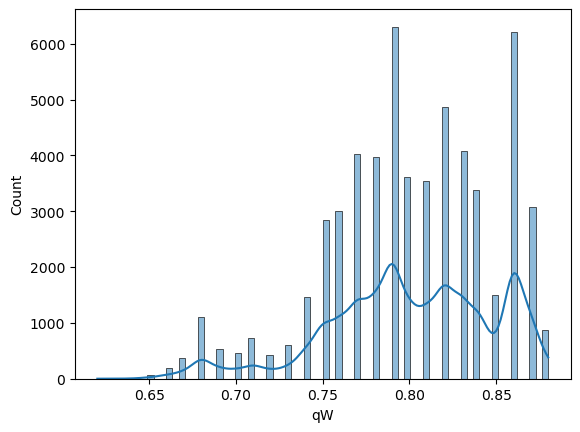

In [32]:
sns.histplot(data=y,x='qW',kde=True)

<Axes: xlabel='Total_Power', ylabel='Count'>

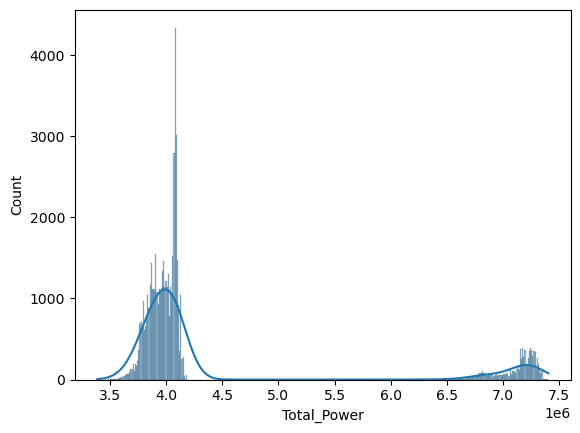

In [33]:
sns.histplot(data=y,x='Total_Power',kde=True)

## 2.2 Processing pipeline

- numerical features: coordination (X1,Y1,...X100,Y100) → scaled;
- numercial feature: "Generator_Size" → not scaled;
- categorical feature: "City" → OneHotEncoder;

In [34]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


# Get list of columns 
num_cols = X.select_dtypes("number").columns.tolist()
# Keep this column in the unscaled list
unscaled_cols = ["Generator_Size"]
# Exclude "Generator_Size" from num_cols
num_cols.remove("Generator_Size")
cat_cols = X.select_dtypes("object").columns

# Define transformers for different column types
num_transformer = make_pipeline(StandardScaler())
# use "passthrough" to indicate that this column should not undergo any transformation and should be passed through to the next step unchanged.
unscaled_transformer = "passthrough"
cat_transformer = make_pipeline(OneHotEncoder(drop="if_binary"))


preprocessor = make_column_transformer(
    (num_transformer,num_cols),   # Scale numeric columns (excluding Generator_Size)
    (unscaled_transformer,unscaled_cols),   # Pass through unscaled columns (Generator_Size)
    (cat_transformer,cat_cols)   # One-hot encode categorical columns
    
)

preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['X1', 'Y1', 'X2', 'Y2', 'X3', 'Y3', 'X4',
                                  'Y4', 'X5', 'Y5', 'X6', 'Y6', 'X7', 'Y7',
                                  'X8', 'Y8', 'X9', 'Y9', 'X10', 'Y10', 'X11',
                                  'Y11', 'X12', 'Y12', 'X13', 'Y13', 'X14',
                                  'Y14', 'X15', 'Y15', ...]),
                                ('passthrough', 'passthrough',
                                 ['Generator_Size']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'))]),
                                 Index(['City'], dtype='object'))])

## 2.3 Hyperparameter tuning for best trained model

In [35]:

from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


# Initialize MultiOutputRegressor with the base regressor (e.g., Ridge regression)
model = MultiOutputRegressor(Ridge())

# Correct parameter grid for tuning Ridge regressor inside MultiOutputRegressor
# accessing parameters of the base estimator in a MultiOutputRegressor
param_grid_ridge = {
    "multioutputregressor__estimator__max_iter": [7000,10000,15000] # Correct syntax for hyperparameter search
}

# Create pipeline with scaling
pipe = make_pipeline(preprocessor,model)

# Use cross validation fold to search the best validation score and hyperparameter setting
grid = GridSearchCV(pipe,cv=5,param_grid=param_grid_ridge,scoring="neg_mean_absolute_error",n_jobs=-1)
grid.fit(X_train,y_train)


# Display best validation score and hyperparameters
print(f"Best Validation Score: {grid.best_score_}")
print(f"With hpyerparameter setting: {grid.best_params_}")


best_train_model = grid.best_estimator_
best_train_model.fit(X_train,y_train)

Best Validation Score: -26111.773135736068
With hpyerparameter setting: {'multioutputregressor__estimator__max_iter': 7000}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['X1', 'Y1', 'X2', 'Y2', 'X3',
                                                   'Y3', 'X4', 'Y4', 'X5', 'Y5',
                                                   'X6', 'Y6', 'X7', 'Y7', 'X8',
                                                   'Y8', 'X9', 'Y9', 'X10',
                                                   'Y10', 'X11', 'Y11', 'X12',
                                                   'Y12', 'X13', 'Y13', 'X14',
                                                   'Y14', 'X15', 'Y15', ...]),
                                                 ('passthrough', 'passthrough',
                                                  ['Generator_Size']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  Index(['City'], dtype='object'))])),
                ('multioutputregressor',
                 MultiOutputRegressor(estimator=Ridge(max_iter=7000)))])

# 2.4 Scoring on the trained data;

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

y_train_predict = best_train_model.predict(X_train)

# metric for qW
qW_mse_train = mean_squared_error(y_train["qW"],y_train_predict[:,0])
qW_mae_train = mean_absolute_error(y_train["qW"],y_train_predict[:,0])
qW_mae_pct_train = mean_absolute_percentage_error(y_train["qW"],y_train_predict[:,0])
qW_r2_train = r2_score(y_train["qW"],y_train_predict[:,0])

# metric for Total_Power
Total_Power_mse_train = mean_squared_error(y_train["Total_Power"],y_train_predict[:,1])
Total_Power_mae_train = mean_absolute_error(y_train["Total_Power"],y_train_predict[:,1])
Total_Power_mae_pct_train = mean_absolute_percentage_error(y_train["Total_Power"],y_train_predict[:,1])
Total_Power_r2_train = r2_score(y_train["Total_Power"],y_train_predict[:,1])


print("The Score of Training Data:")

print(f"Total_Power MSE Score: {Total_Power_mse_train}")
print(f"Total_Power MAE Score: {Total_Power_mae_train}")
print(f"Total_Power MAE PCT Score: {Total_Power_mae_pct_train}")
print(f"Total_Power R_2 Score: {Total_Power_r2_train}")

print("------------------------------------------------")

print(f"qW MSE Score: {qW_mse_train}")
print(f"qW MAE Score: {qW_mae_train}")
print(f"qW MAE PCT Score: {qW_mae_pct_train}")
print(f"qW R_2 Score: {qW_r2_train}")

The Score of Training Data:
Total_Power MSE Score: 5052173978.145627
Total_Power MAE Score: 51662.44318668736
Total_Power MAE PCT Score: 0.011663906507578953
Total_Power R_2 Score: 0.9961146539569852
------------------------------------------------
qW MSE Score: 0.00017078439647617467
qW MAE Score: 0.009803163211249263
qW MAE PCT Score: 0.012414207911138772
qW R_2 Score: 0.9258576553371054


In [37]:
type(y_train_predict)

numpy.ndarray

# 2.5 Scoring on the test data

In [38]:
y_test_predict = best_train_model.predict(X_test)

# metric for qW
qW_mse_test = mean_squared_error(y_test["qW"],y_test_predict[:,0])
qW_mae_test = mean_absolute_error(y_test["qW"],y_test_predict[:,0])
qW_mae_pct_test = mean_absolute_percentage_error(y_test["qW"],y_test_predict[:,0])
qW_r2_test = r2_score(y_test["qW"],y_test_predict[:,0])

# metric for Total_Power
Total_Power_mse_test = mean_squared_error(y_test["Total_Power"],y_test_predict[:,1])
Total_Power_mae_test = mean_absolute_error(y_test["Total_Power"],y_test_predict[:,1])
Total_Power_mae_pct_test = mean_absolute_percentage_error(y_test["Total_Power"],y_test_predict[:,1])
Total_Power_r2_test = r2_score(y_test["Total_Power"],y_test_predict[:,1])


print("The Score of testing Data:")

print(f"Total_Power MSE Score: {Total_Power_mse_test}")
print(f"Total_Power MAE Score: {Total_Power_mae_test}")
print(f"Total_Power MAE PCT Score: {Total_Power_mae_pct_test}")
print(f"Total_Power R_2 Score: {Total_Power_r2_test}")

print("------------------------------------------------")

print(f"qW MSE Score: {qW_mse_test}")
print(f"qW MAE Score: {qW_mae_test}")
print(f"qW MAE PCT Score: {qW_mae_pct_test}")
print(f"qW R_2 Score: {qW_r2_test}")

The Score of testing Data:
Total_Power MSE Score: 5586649674.577079
Total_Power MAE Score: 52461.35435258867
Total_Power MAE PCT Score: 0.011844061302582871
Total_Power R_2 Score: 0.9954897921178348
------------------------------------------------
qW MSE Score: 0.00018816666447756022
qW MAE Score: 0.009995228195793623
qW MAE PCT Score: 0.012660509178856954
qW R_2 Score: 0.9164784114592603


## 2.6 Refit best tested model on full data (two cities with two) 

In [39]:
best_train_model.fit(X,y)

y_pred = best_train_model.predict(X)

mse = mean_squared_error(y,y_pred)
mae = mean_absolute_error(y,y_pred)
mae_pct = mean_absolute_percentage_error(y,y_pred)
r2 = r2_score(y,y_pred)


print("The Score of Testing Data:")
print(f"MSE Score: {mse}")
print(f"MAE Score: {mae}")
print(f"MAE PCT Score: {mae_pct}")
print(f"R_2 Score: {r2}")

The Score of Testing Data:
MSE Score: 2559355717.667509
MAE Score: 25958.545954965975
MAE PCT Score: 0.012106392783772891
R_2 Score: 0.9602638971970082


## 2.7 Save Best Trained Model to Hard Drive

In [40]:
from joblib import dump

dump(best_train_model,"best_train_model.joblib")

['best_train_model.joblib']

# 3. Predict on Unseen Data

In [41]:
df_unseen_to_be_predict

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size
0,200.0,0.0,146.10,37.53,89.75,74.89,32.47,112.07,600.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49
1,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49
2,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49
3,200.0,0.0,146.10,37.53,89.75,74.89,32.47,112.07,600.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49
4,400.0,0.0,346.10,37.53,289.75,74.89,232.47,112.07,600.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6357,198.0,0.0,197.60,72.52,193.04,150.00,84.79,198.00,398.0,0.0,...,598.0,1200.0,597.60,1272.52,593.04,1350.00,484.79,1398.0,Sydney,100
6358,198.0,0.0,96.79,74.77,192.57,150.00,86.00,183.00,398.0,0.0,...,786.0,1195.0,796.79,1274.77,842.57,1400.00,699.00,1403.0,Sydney,100
6359,598.0,0.0,597.72,67.53,593.10,146.65,549.00,198.00,198.0,200.0,...,1198.0,1200.0,1197.72,1267.53,1193.10,1346.65,1149.00,1398.0,Sydney,100
6360,398.0,0.0,397.18,80.53,393.59,150.00,277.58,198.00,1398.0,0.0,...,1398.0,1200.0,1397.18,1280.53,1393.59,1350.00,1277.58,1398.0,Sydney,100


In [42]:
df_unseen_to_be_predict = pd.read_csv("df_unseen_to_be_predict.csv")

X_unseen = df_unseen_to_be_predict.copy()

df_unseen_to_be_predict[["qW_Predicted","Total_Power_Predicted"]] = best_train_model.predict(X_unseen)
# Convert the predicted values to plain decimal notation
df_unseen_to_be_predict[["qW_Predicted","Total_Power_Predicted"]] = df_unseen_to_be_predict[["qW_Predicted","Total_Power_Predicted"]].round(2)


In [43]:
df_unseen_to_be_predict

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW_Predicted,Total_Power_Predicted
0,200.0,0.0,146.10,37.53,89.75,74.89,32.47,112.07,600.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49,0.85,3984665.68
1,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49,0.84,3953690.55
2,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49,0.84,3966881.26
3,200.0,0.0,146.10,37.53,89.75,74.89,32.47,112.07,600.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49,0.85,4014223.51
4,400.0,0.0,346.10,37.53,289.75,74.89,232.47,112.07,600.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49,0.85,4018813.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6357,198.0,0.0,197.60,72.52,193.04,150.00,84.79,198.00,398.0,0.0,...,597.60,1272.52,593.04,1350.00,484.79,1398.0,Sydney,100,0.67,7136326.39
6358,198.0,0.0,96.79,74.77,192.57,150.00,86.00,183.00,398.0,0.0,...,796.79,1274.77,842.57,1400.00,699.00,1403.0,Sydney,100,0.68,7187490.55
6359,598.0,0.0,597.72,67.53,593.10,146.65,549.00,198.00,198.0,200.0,...,1197.72,1267.53,1193.10,1346.65,1149.00,1398.0,Sydney,100,0.64,6837265.21
6360,398.0,0.0,397.18,80.53,393.59,150.00,277.58,198.00,1398.0,0.0,...,1397.18,1280.53,1393.59,1350.00,1277.58,1398.0,Sydney,100,0.67,7042473.56


In [44]:
df_unseen_original = pd.read_csv("df_unseen_original.csv")

df_unseen_original

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,200.0,0.0,146.10,37.53,89.75,74.89,32.47,112.07,600.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49,0.82,3857887.17
1,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49,0.83,3929983.50
2,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49,0.84,3972454.15
3,200.0,0.0,146.10,37.53,89.75,74.89,32.47,112.07,600.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49,0.85,3999093.91
4,400.0,0.0,346.10,37.53,289.75,74.89,232.47,112.07,600.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,Perth,49,0.84,3963767.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6357,198.0,0.0,197.60,72.52,193.04,150.00,84.79,198.00,398.0,0.0,...,597.60,1272.52,593.04,1350.00,484.79,1398.0,Sydney,100,0.66,6931277.32
6358,198.0,0.0,96.79,74.77,192.57,150.00,86.00,183.00,398.0,0.0,...,796.79,1274.77,842.57,1400.00,699.00,1403.0,Sydney,100,0.68,7192144.17
6359,598.0,0.0,597.72,67.53,593.10,146.65,549.00,198.00,198.0,200.0,...,1197.72,1267.53,1193.10,1346.65,1149.00,1398.0,Sydney,100,0.64,6799187.00
6360,398.0,0.0,397.18,80.53,393.59,150.00,277.58,198.00,1398.0,0.0,...,1397.18,1280.53,1393.59,1350.00,1277.58,1398.0,Sydney,100,0.67,7084526.52


In [45]:
df_prediction_compare = pd.concat([df_unseen_original.iloc[:,-4:],df_unseen_to_be_predict.iloc[:,-2:]],axis=1)
df_prediction_compare = df_prediction_compare[["City", "Generator_Size","qW","qW_Predicted","Total_Power","Total_Power_Predicted"]]

In [46]:
df_prediction_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362 entries, 0 to 6361
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   6362 non-null   object 
 1   Generator_Size         6362 non-null   int64  
 2   qW                     6362 non-null   float64
 3   qW_Predicted           6362 non-null   float64
 4   Total_Power            6362 non-null   float64
 5   Total_Power_Predicted  6362 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 298.3+ KB


In [47]:
df_prediction_compare

,City,Generator_Size,qW,qW_Predicted,Total_Power,Total_Power_Predicted
0,Perth,49,0.82,0.85,3857887.17,3984665.68
1,Perth,49,0.83,0.84,3929983.50,3953690.55
2,Perth,49,0.84,0.84,3972454.15,3966881.26
3,Perth,49,0.85,0.85,3999093.91,4014223.51
4,Perth,49,0.84,0.85,3963767.64,4018813.98
...,...,...,...,...,...,...
6357,Sydney,100,0.66,0.67,6931277.32,7136326.39
6358,Sydney,100,0.68,0.68,7192144.17,7187490.55
6359,Sydney,100,0.64,0.64,6799187.00,6837265.21
6360,Sydney,100,0.67,0.67,7084526.52,7042473.56


In [48]:
df_prediction_compare["qW"]

0       0.82
1       0.83
2       0.84
3       0.85
4       0.84
        ... 
6357    0.66
6358    0.68
6359    0.64
6360    0.67
6361    0.68
Name: qW, Length: 6362, dtype: float64

In [49]:
# metric for qW
qW_mse_predict = mean_squared_error(df_prediction_compare["qW"],df_prediction_compare["qW_Predicted"])
qW_mae_predict = mean_absolute_error(df_prediction_compare["qW"],df_prediction_compare["qW_Predicted"])
qW_mae_pct_predict = mean_absolute_percentage_error(df_prediction_compare["qW"],df_prediction_compare["qW_Predicted"])
qW_r2_predict = r2_score(df_prediction_compare["qW"],df_prediction_compare["qW_Predicted"])

# metric for Total_Power
Total_Power_mse_predict = mean_squared_error(df_prediction_compare["Total_Power"],df_prediction_compare["Total_Power_Predicted"])
Total_Power_mae_predict = mean_absolute_error(df_prediction_compare["Total_Power"],df_prediction_compare["Total_Power_Predicted"])
Total_Power_mae_pct_predict = mean_absolute_percentage_error(df_prediction_compare["Total_Power"],df_prediction_compare["Total_Power_Predicted"])
Total_Power_r2_predict = r2_score(df_prediction_compare["Total_Power"],df_prediction_compare["Total_Power_Predicted"])


print("The Score of Prediction Data:")

print(f"Total_Power MSE Score: {Total_Power_mse_predict}")
print(f"Total_Power MAE Score: {Total_Power_mae_predict}")
print(f"Total_Power MAE PCT Score: {Total_Power_mae_pct_predict}")
print(f"Total_Power R_2 Score: {Total_Power_r2_predict}")

print("------------------------------------------------")

print(f"qW MSE Score: {qW_mse_predict}")
print(f"qW MAE Score: {qW_mae_predict}")
print(f"qW MAE PCT Score: {qW_mae_pct_predict}")
print(f"qW R_2 Score: {qW_r2_predict}")

The Score of Prediction Data:
Total_Power MSE Score: 7665460732.331535
Total_Power MAE Score: 64435.09954259668
Total_Power MAE PCT Score: 0.014854882599934258
Total_Power R_2 Score: 0.9939928449674503
------------------------------------------------
qW MSE Score: 0.0002894844388557056
qW MAE Score: 0.012170701037409618
qW MAE PCT Score: 0.015336307853380002
qW R_2 Score: 0.8766275064113942


In [50]:
def calculate_metrics(group):
    
    series_metric = pd.Series(
        {
            "MSE (qW)": mean_squared_error(group["qW"],group["qW_Predicted"]),
            "MAE (qW)": mean_absolute_error(group["qW"],group["qW_Predicted"]),
            "MAE_PCT (qW)": mean_absolute_percentage_error(group["qW"],group["qW_Predicted"]),
            "R_2 (qW)": r2_score(group["qW"],group["qW_Predicted"]),          

            "MSE (Total_Power)": mean_squared_error(group["Total_Power"],group["Total_Power_Predicted"]),
            "MAE (Total_Power)": mean_absolute_error(group["Total_Power"],group["Total_Power_Predicted"]),
            "MAE_PCT (Total_Power)": mean_absolute_percentage_error(group["Total_Power"],group["Total_Power_Predicted"]),
            "R_2 (Total_Power)": r2_score(group["Total_Power"],group["Total_Power_Predicted"]),      
        }
    )

    return series_metric



grouped_metric = df_prediction_compare.groupby(["City","Generator_Size"]).apply(calculate_metrics)

grouped_metric

C:\Users\taoti\AppData\Local\Temp\ipykernel_18780\2192872348.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_metric = df_prediction_compare.groupby(["City","Generator_Size"]).apply(calculate_metrics)


MSE (qW)  MAE (qW)  MAE_PCT (qW)  R_2 (qW)  \
City   Generator_Size                                               
Perth  49              0.000354  0.013687      0.016656  0.394947   
       100             0.000292  0.012692      0.017359  0.357810   
Sydney 49              0.000157  0.008948      0.011562  0.200701   
       100             0.000313  0.011940      0.017709 -1.566872   

                       MSE (Total_Power)  MAE (Total_Power)  \
City   Generator_Size                                         
Perth  49                   7.617416e+09       65573.779914   
       100                  1.385062e+10       90295.893956   
Sydney 49                   3.858819e+09       47004.000189   
       100                  1.848847e+10      100607.877414   

                       MAE_PCT (Total_Power)  R_2 (Total_Power)  
City   Generator_Size                                            
Perth  49                           0.016862           0.408061  
       100                          0.012871           0.666553  
Sydney 49                           0.011729           0.237075  
       100                          0.014102          -0.487023

In [51]:
group_size = df_prediction_compare.groupby(["City", "Generator_Size"]).size()
print(group_size) 

City    Generator_Size
Perth   49                3605
        100                728
Sydney  49                1797
        100                232
dtype: int64


In [52]:
df_prediction_compare.groupby(["City", "Generator_Size"]).describe()

qW                                              \
                        count      mean       std   min   25%   50%   75%   
City   Generator_Size                                                       
Perth  49              3605.0  0.836044  0.024177  0.72  0.82  0.84  0.86   
       100              728.0  0.735865  0.021339  0.66  0.72  0.74  0.75   
Sydney 49              1797.0  0.776912  0.014011  0.70  0.77  0.78  0.79   
       100              232.0  0.677155  0.011073  0.64  0.67  0.68  0.68   

                            qW_Predicted            ...  Total_Power  \
                        max        count      mean  ...          75%   
City   Generator_Size                               ...                
Perth  49              0.87       3605.0  0.841187  ...  4045164.900   
       100             0.76        728.0  0.737266  ...  7257985.040   
Sydney 49              0.80       1797.0  0.777234  ...  4083677.390   
       100             0.70        232.0  0.675043  ...  7235731.005   

                                  Total_Power_Predicted                \
                              max                 count          mean   
City   Generator_Size                                                   
Perth  49              4112548.60                3605.0  3.967005e+06   
       100             7347403.40                 728.0  7.106713e+06   
Sydney 49              4139926.40                1797.0  4.029268e+06   
       100             7397965.27                 232.0  7.141601e+06   

                                                                            \
                                 std         min          25%          50%   
City   Generator_Size                                                        
Perth  49               74128.486756  3708560.69  3922939.970  3973315.380   
       100             157972.612563  6374143.57  7008719.860  7130004.875   
Sydney 49               53351.374411  3742705.45  4001985.270  4034685.540   
       100             111299.531050  6159568.73  7093650.825  7152616.945   

                                               
                              75%         max  
City   Generator_Size                          
Perth  49              4014415.96  4543016.08  
       100             7216293.63  7545768.49  
Sydney 49              4064969.61  4442707.40  
       100             7190173.28  7656339.54  

[4 rows x 32 columns]